# Modelos de Machine Learning

In [1]:
from tsbook.datasets.retail import SyntheticRetail
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster

dataset = SyntheticRetail("univariate")
y_train, X_train, y_test, X_test = dataset.load(
    "y_train", "X_train", "y_test", "X_test"
)

X_train

,promo
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
...,...
2024-07-01,1.0
2024-07-02,0.0
2024-07-03,0.0


In [2]:
from tsbook.forecasting.global_reduction import GlobalReductionForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.transformations.series.difference import Differencer

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model = Differencer() * GlobalReductionForecaster(
    regressor,
    window_length=30,
    steps_ahead=1,
)

model.fit(y_train, X=X_train)
y_pred = model.predict(fh=y_test.index, X=X_test)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='sales'>)

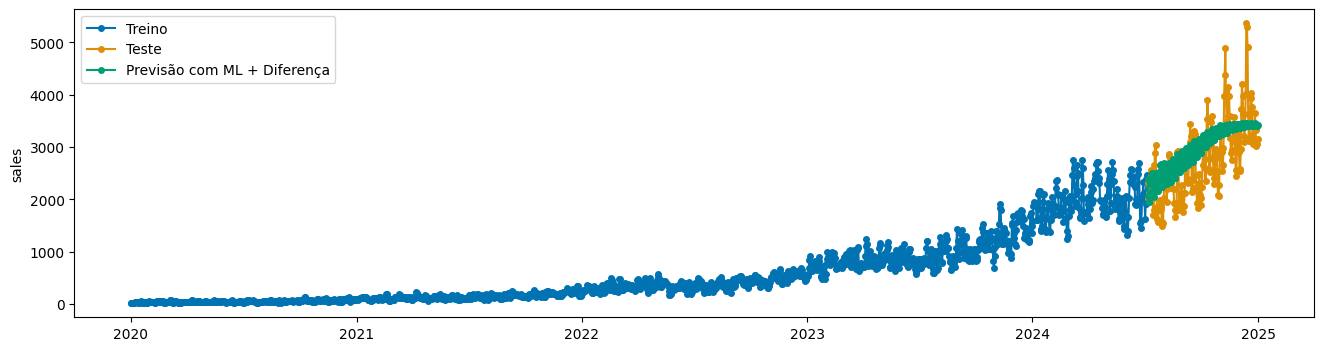

In [3]:
plot_series(
    y_train, y_test, y_pred, labels=["Treino", "Teste", "Previsão com ML + Diferença"]
)

In [4]:
import numpy as np
from typing import Callable, Tuple

model = GlobalReductionForecaster(
    regressor,
    window_length=30,
    steps_ahead=1,
    normalization_strategy="divide_mean",
)

model.fit(y_train, X=X_train)
y_pred = model.predict(fh=y_test.index, X=X_test)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='sales'>)

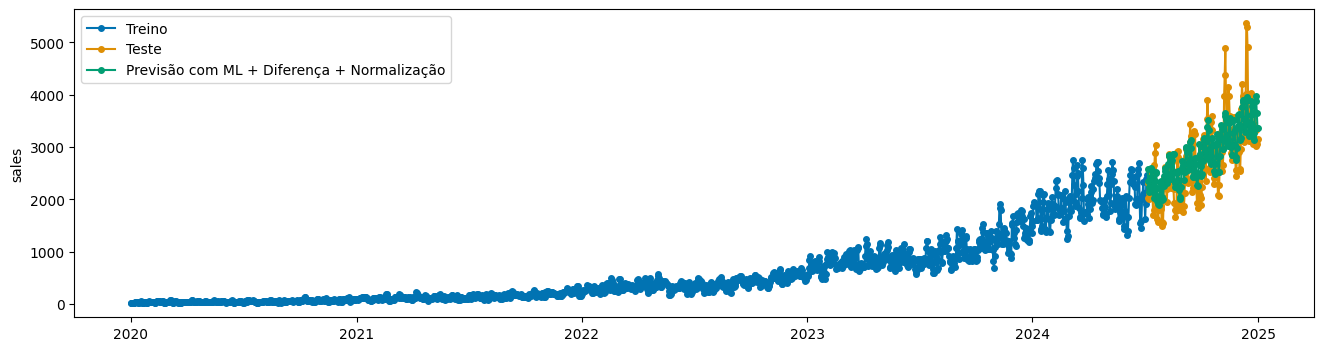

In [5]:
plot_series(
    y_train, y_test, y_pred, labels=["Treino", "Teste", "Previsão com ML + Diferença + Normalização"]
)

In [6]:
from tsbook.forecasting.global_reduction import GlobalReductionForecaster
from typing import Optional


model = GlobalReductionForecaster(
    regressor,
    window_length=30,
    steps_ahead=12,
    normalization_strategy="divide_mean",
)

model.fit(y_train, X=X_train)
y_pred = model.predict(fh=y_test.index, X=X_test)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='sales'>)

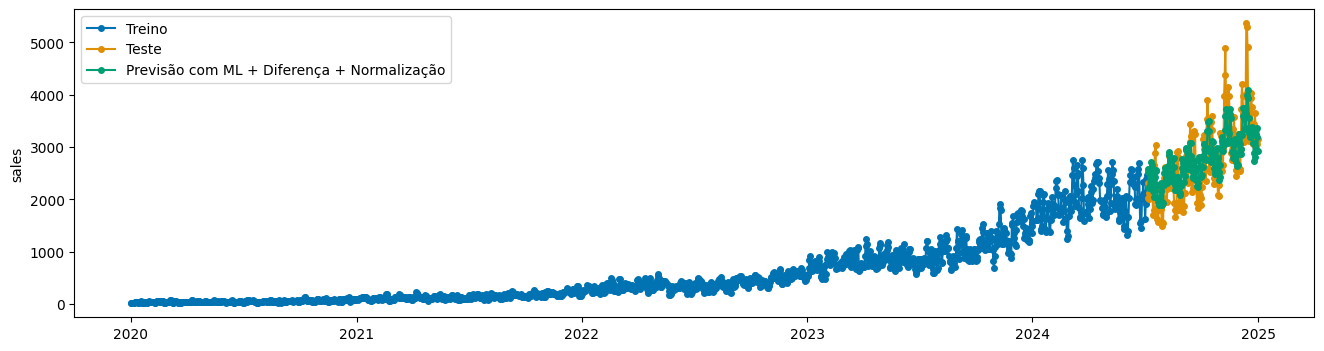

In [7]:
plot_series(
    y_train,
    y_test,
    y_pred,
    labels=["Treino", "Teste", "Previsão com ML + Diferença + Normalização"],
)